# Data analysis final project - Cars

## Exploratory Data Analysis (EDA)

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the dataset
df = pd.read_csv("C:\\Users\\adria\\OneDrive\\Desktop\\Car Price Prediction\\Car Price Prediction\\Car Price Prediction.csv")

# Display the first few rows of the dataset
print(df.head())

# Display basic information about the dataset
print(df.info())

# Describe the dataset to understand statistical properties
print(df.describe())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

## Data Cleaning

In [100]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (if any)
df = df.dropna()

# Display column names to identify correct names for categorical variables
print(df.columns)

# Based on the Data Dictionary and the dataset
categorical_columns = ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 
                       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

# Verify if the categorical columns exist in the DataFrame
for col in categorical_columns:
    if col not in df.columns:
        print(f"Column {col} does not exist in the DataFrame.")
    else:
        print(f"Column {col} exists in the DataFrame.")

# Convert categorical columns to numerical using one-hot encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the cleaned data
print(df.head())


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64
Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')
Column

## Feature Correlation Analysis

price                        1.000000
enginesize                   0.874145
curbweight                   0.835305
horsepower                   0.808139
carwidth                     0.759325
carlength                    0.682920
drivewheel_rwd               0.638957
wheelbase                    0.577816
boreratio                    0.553173
fuelsystem_mpfi              0.517075
CarName_plymouth fury iii   -0.091871
fueltype_gas                -0.105679
car_ID                      -0.109093
carbody_hatchback           -0.262039
enginetype_ohc              -0.344270
fuelsystem_2bbl             -0.501374
drivewheel_fwd              -0.601950
citympg                     -0.685751
highwaympg                  -0.697599
cylindernumber_four         -0.697762
Name: price, dtype: float64


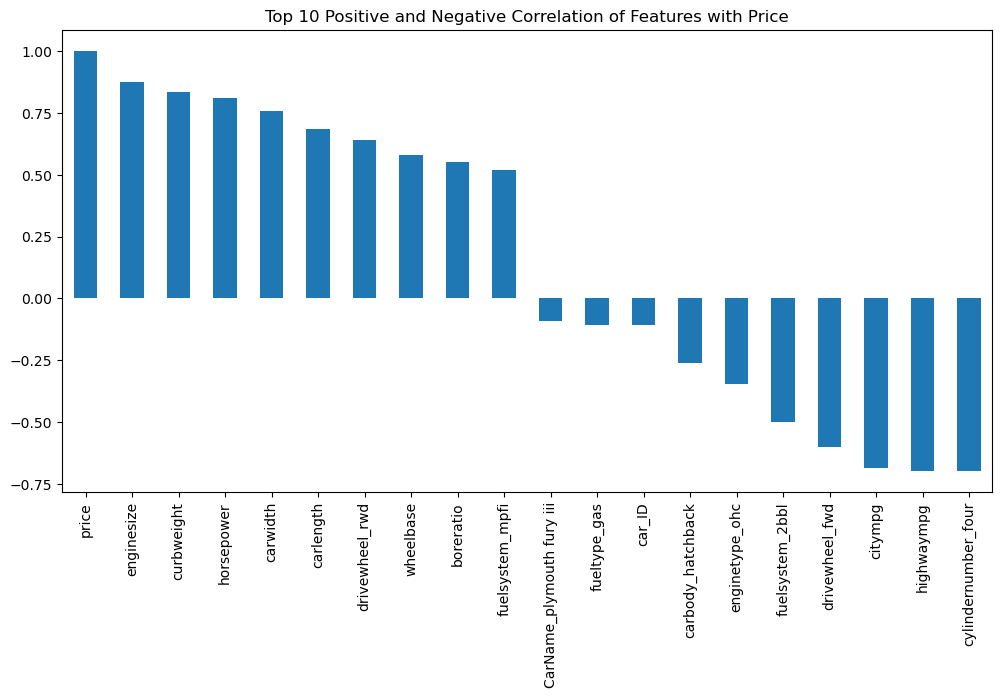

In [101]:
# Calculate correlation of all features with the target variable 'price'
correlation_with_price = df.corr()['price'].sort_values(ascending=False)

# Select top 10 positive and top 10 negative correlations
top_10_positive_corr = correlation_with_price.head(10)
top_10_negative_corr = correlation_with_price.tail(10)

# Combine these for plotting
top_features = pd.concat([top_10_positive_corr, top_10_negative_corr])

print(top_features)

# Plot the correlation of top features with 'price'
plt.figure(figsize=(12, 6))
top_features.plot(kind='bar')
plt.title('Top 10 Positive and Negative Correlation of Features with Price')
plt.show()


## Data Preparation and Splitting

In [102]:
# Define features (X) and target variable (y)
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {X_train.shape}')
print(f'Testing set size: {X_test.shape}')

Training set size: (164, 190)
Testing set size: (41, 190)


## Build, Train and Optimize model

In [103]:
# Create a pipeline with StandardScaler and Ridge regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Define the parameter grid for Ridge regression
param_grid = {
    'ridge__alpha': [0.1, 1, 10, 100, 200],
    'ridge__fit_intercept': [True, False]
}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Display the best parameters
print(f'Best parameters: {grid_search.best_params_}')

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_best = best_model.predict(X_test)

# Evaluate the model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Best Mean Squared Error: {mse_best}')
print(f'Best R^2 Score: {r2_best}')

Best parameters: {'ridge__alpha': 10, 'ridge__fit_intercept': True}
Best Mean Squared Error: 16426879.048186395
Best R^2 Score: 0.7919173755637866


## Additional Model Evaluation Metrics

In [104]:
# Mean Absolute Error
mae_best = mean_absolute_error(y_test, y_pred_best)
# Root Mean Squared Error
rmse_best = np.sqrt(mse_best)

print(f'Best Mean Absolute Error: {mae_best}')
print(f'Best Root Mean Squared Error: {rmse_best}')

Best Mean Absolute Error: 2519.071983446171
Best Root Mean Squared Error: 4053.008641513906


## Model Comparison

In [105]:
# Initialize multiple regression models
models = {
    'Linear Regression': Pipeline([('scaler', StandardScaler()), ('linreg', LinearRegression())]),
    'Ridge Regression': Pipeline([('scaler', StandardScaler()), ('ridge', Ridge(alpha=grid_search.best_params_['ridge__alpha'], fit_intercept=grid_search.best_params_['ridge__fit_intercept']))]),
    'Lasso Regression': Pipeline([('scaler', StandardScaler()), ('lasso', Lasso(alpha=0.01, max_iter=10000))])  # Adjusted alpha and increased iterations
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R^2': r2}

# Display results
print(pd.DataFrame(results).T)


                            MSE           R^2
Linear Regression  9.346061e+30 -1.183885e+23
Ridge Regression   1.642688e+07  7.919174e-01
Lasso Regression   1.740230e+08 -1.204384e+00


C:\Users\adria\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.014e+07, tolerance: 9.781e+05
  model = cd_fast.enet_coordinate_descent(


## Visualisations

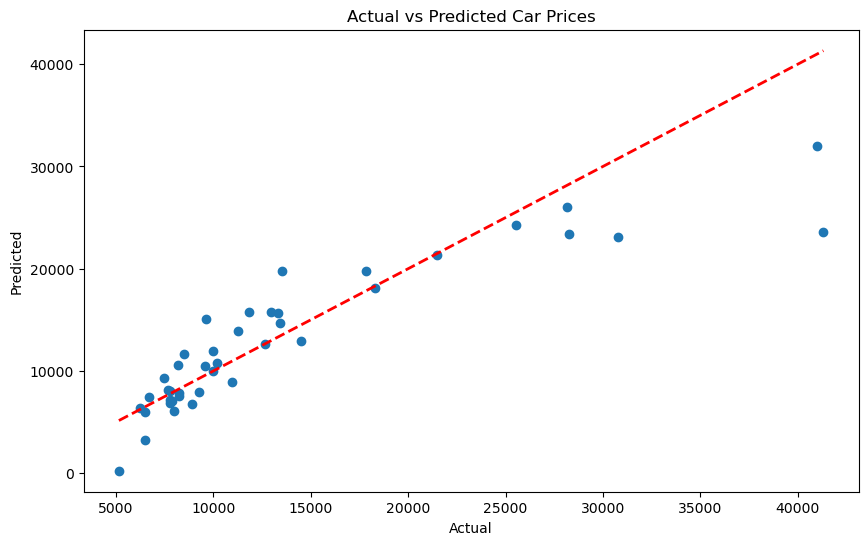

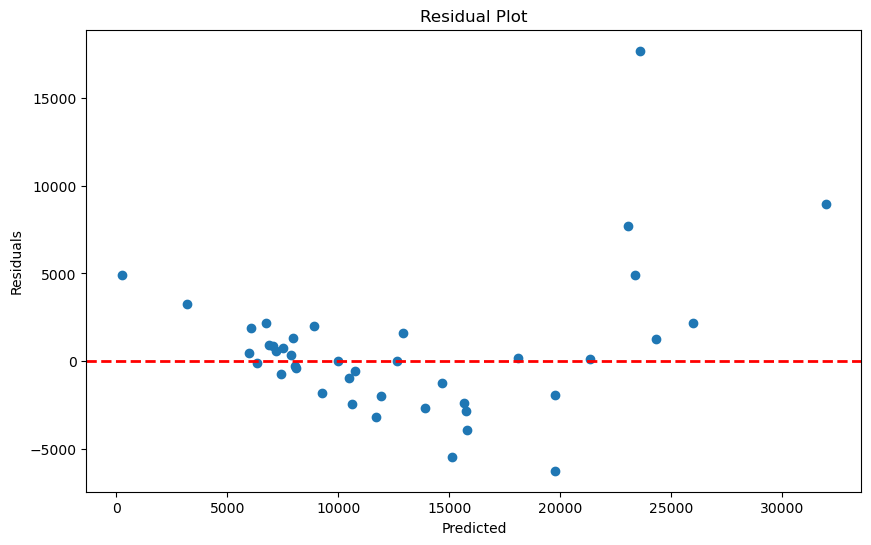

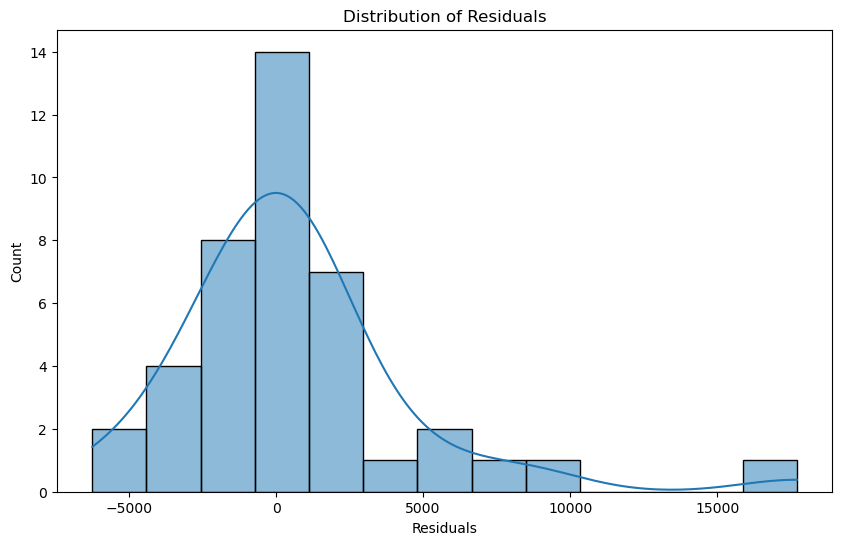

In [106]:
# Scatter Plot of Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Car Prices')
plt.show()

# Residual Plot
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred_best
plt.scatter(y_pred_best, residuals)
plt.axhline(0, linestyle='--', color='r', linewidth=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Distribution Plot of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()